In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense

# Data preprocessing

In [2]:
data = pd.read_csv("COMPLETE_DATA.csv",sep=";", decimal='.') #import dataset
data.head() #Visualize first 5 rows of dataset

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
0,ND3X0.0,-0.0004,-0.0002,3.0,0,0.0066,1.6712,0.0001,2.0400,0.7129,0.3687
1,ND3X0.2,-0.0004,0.5391,3.0,0,0.0063,1.6898,0.0004,2.0409,0.7129,0.3511
2,ND3X0.4,-0.0004,1.0784,3.0,0,0.0057,1.7185,0.0004,2.0314,0.7090,0.3129
3,ND3X0.6,-0.0004,1.6178,3.0,0,0.0049,1.7692,0.0000,2.0348,0.7142,0.2656
4,ND3X0.8,-0.0004,2.1571,3.0,0,0.0041,1.8047,0.0000,2.0267,0.7106,0.2220


In [3]:
data.shape #visualize dataset dimensions

(10582, 11)

In [4]:
X = data[["Xshift","Yshift","Zshift","alpha_deg"]].values #select only input features
Y = data["2nd_exc_f"].values #select outupt variable

In [5]:
#Data splitting into training and testing, with 20% test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

In [6]:
#Data preprocessing with Standard Scaling, removing mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [7]:
type(y_train[0])

numpy.float64

In [8]:
X_train.shape[1]

4

# Neural Netowork

In [9]:
#Building Neural Network architecture
model = Sequential()
model.add(Dense(32, input_shape=(4,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [10]:
#Choose optimization parameters
model.compile(loss='mse', optimizer='adam')

In [11]:
#A brief summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [12]:
#number of epochs used for training
num_epochs = 1000

In [13]:
#callback = EarlyStopping(monitor="val_loss", patience=100, verbose=1)

In [14]:
#Model training
#%%time
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/1000
239/239 [==============================] - 1s 2ms/step - loss: 0.0328 - val_loss: 0.0186
Epoch 2/1000
239/239 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0142
Epoch 3/1000
239/239 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0114
Epoch 4/1000
239/239 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0096
Epoch 5/1000
239/239 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0076
Epoch 6/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.0065 - val_loss: 0.0066
Epoch 7/1000
239/239 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0058
Epoch 8/1000
239/239 [==============================] - 1s 2ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 9/1000
239/239 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0049
Epoch 10/1000
239/239 [==============================] - 1s 2ms/step - loss: 0.004

Epoch 79/1000
239/239 [==============================] - 0s 2ms/step - loss: 6.2468e-04 - val_loss: 6.8895e-04
Epoch 80/1000
239/239 [==============================] - 0s 2ms/step - loss: 6.7888e-04 - val_loss: 9.2240e-04
Epoch 81/1000
239/239 [==============================] - 0s 2ms/step - loss: 6.4930e-04 - val_loss: 6.6063e-04
Epoch 82/1000
239/239 [==============================] - 0s 2ms/step - loss: 6.5921e-04 - val_loss: 0.0011
Epoch 83/1000
239/239 [==============================] - 0s 2ms/step - loss: 7.2865e-04 - val_loss: 6.4271e-04
Epoch 84/1000
239/239 [==============================] - 0s 2ms/step - loss: 6.8025e-04 - val_loss: 9.6499e-04
Epoch 85/1000
239/239 [==============================] - 0s 2ms/step - loss: 6.8360e-04 - val_loss: 7.2339e-04
Epoch 86/1000
239/239 [==============================] - 0s 1ms/step - loss: 6.2166e-04 - val_loss: 0.0010
Epoch 87/1000
239/239 [==============================] - 0s 2ms/step - loss: 6.1767e-04 - val_loss: 7.7683e-04
Epoch 88/

239/239 [==============================] - 0s 1ms/step - loss: 5.1326e-04 - val_loss: 4.2936e-04
Epoch 153/1000
239/239 [==============================] - 0s 1ms/step - loss: 4.4338e-04 - val_loss: 5.2756e-04
Epoch 154/1000
239/239 [==============================] - 0s 1ms/step - loss: 5.0567e-04 - val_loss: 4.6292e-04
Epoch 155/1000
239/239 [==============================] - 0s 1ms/step - loss: 5.7388e-04 - val_loss: 5.1348e-04
Epoch 156/1000
239/239 [==============================] - 0s 1ms/step - loss: 4.2202e-04 - val_loss: 5.4873e-04
Epoch 157/1000
239/239 [==============================] - 0s 1ms/step - loss: 4.9925e-04 - val_loss: 4.5515e-04
Epoch 158/1000
239/239 [==============================] - 0s 1ms/step - loss: 5.4186e-04 - val_loss: 6.7042e-04
Epoch 159/1000
239/239 [==============================] - 0s 1ms/step - loss: 5.0885e-04 - val_loss: 9.5005e-04
Epoch 160/1000
239/239 [==============================] - 0s 1ms/step - loss: 7.7521e-04 - val_loss: 4.4783e-04
Epoch 1

239/239 [==============================] - 0s 1ms/step - loss: 3.5711e-04 - val_loss: 4.2609e-04
Epoch 226/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.3336e-04 - val_loss: 5.2526e-04
Epoch 227/1000
239/239 [==============================] - 0s 1ms/step - loss: 4.3881e-04 - val_loss: 4.0602e-04
Epoch 228/1000
239/239 [==============================] - 0s 1ms/step - loss: 4.0320e-04 - val_loss: 5.1799e-04
Epoch 229/1000
239/239 [==============================] - 0s 1ms/step - loss: 4.2975e-04 - val_loss: 5.2880e-04
Epoch 230/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.5749e-04 - val_loss: 4.7102e-04
Epoch 231/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.9487e-04 - val_loss: 4.1678e-04
Epoch 232/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.5221e-04 - val_loss: 3.6266e-04
Epoch 233/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.3626e-04 - val_loss: 4.0973e-04
Epoch 2

239/239 [==============================] - 0s 1ms/step - loss: 3.1907e-04 - val_loss: 4.4782e-04
Epoch 299/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.5465e-04 - val_loss: 3.2985e-04
Epoch 300/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.5497e-04 - val_loss: 3.5578e-04
Epoch 301/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.7988e-04 - val_loss: 4.0036e-04
Epoch 302/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.6751e-04 - val_loss: 3.9432e-04
Epoch 303/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.4791e-04 - val_loss: 2.8384e-04
Epoch 304/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.3331e-04 - val_loss: 4.2548e-04
Epoch 305/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.8729e-04 - val_loss: 3.4357e-04
Epoch 306/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.8254e-04 - val_loss: 3.6686e-04
Epoch 3

239/239 [==============================] - 0s 1ms/step - loss: 3.1682e-04 - val_loss: 3.5928e-04
Epoch 372/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.2087e-04 - val_loss: 3.2989e-04
Epoch 373/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7715e-04 - val_loss: 3.1211e-04
Epoch 374/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.8956e-04 - val_loss: 5.0823e-04
Epoch 375/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.2477e-04 - val_loss: 5.2748e-04
Epoch 376/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.8432e-04 - val_loss: 4.7665e-04
Epoch 377/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.1428e-04 - val_loss: 3.7619e-04
Epoch 378/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.8743e-04 - val_loss: 2.9296e-04
Epoch 379/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.6606e-04 - val_loss: 5.1123e-04
Epoch 3

239/239 [==============================] - 0s 1ms/step - loss: 2.9777e-04 - val_loss: 2.5615e-04
Epoch 445/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.0196e-04 - val_loss: 2.9706e-04
Epoch 446/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7379e-04 - val_loss: 4.2695e-04
Epoch 447/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.9264e-04 - val_loss: 2.6480e-04
Epoch 448/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7913e-04 - val_loss: 3.0354e-04
Epoch 449/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7850e-04 - val_loss: 3.0040e-04
Epoch 450/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.6954e-04 - val_loss: 2.7950e-04
Epoch 451/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.8169e-04 - val_loss: 3.3975e-04
Epoch 452/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.6195e-04 - val_loss: 2.7151e-04
Epoch 4

239/239 [==============================] - 0s 1ms/step - loss: 2.7256e-04 - val_loss: 3.4967e-04
Epoch 518/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.3643e-04 - val_loss: 3.2735e-04
Epoch 519/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7604e-04 - val_loss: 3.3144e-04
Epoch 520/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.1096e-04 - val_loss: 3.2305e-04
Epoch 521/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.2413e-04 - val_loss: 2.7087e-04
Epoch 522/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.4421e-04 - val_loss: 2.9343e-04
Epoch 523/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.4577e-04 - val_loss: 2.7056e-04
Epoch 524/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.4263e-04 - val_loss: 3.6670e-04
Epoch 525/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7706e-04 - val_loss: 2.8778e-04
Epoch 5

239/239 [==============================] - 0s 1ms/step - loss: 3.0952e-04 - val_loss: 3.1609e-04
Epoch 591/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7886e-04 - val_loss: 2.5096e-04
Epoch 592/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.5098e-04 - val_loss: 3.0578e-04
Epoch 593/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.9272e-04 - val_loss: 2.7997e-04
Epoch 594/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.3413e-04 - val_loss: 2.2939e-04
Epoch 595/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.1606e-04 - val_loss: 2.4104e-04
Epoch 596/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.5134e-04 - val_loss: 2.6670e-04
Epoch 597/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.3578e-04 - val_loss: 3.0902e-04
Epoch 598/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.3574e-04 - val_loss: 3.8649e-04
Epoch 5

239/239 [==============================] - 0s 1ms/step - loss: 1.9875e-04 - val_loss: 3.7550e-04
Epoch 664/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.6330e-04 - val_loss: 2.3085e-04
Epoch 665/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.4526e-04 - val_loss: 3.6167e-04
Epoch 666/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.3627e-04 - val_loss: 2.4638e-04
Epoch 667/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.2780e-04 - val_loss: 2.8782e-04
Epoch 668/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.6392e-04 - val_loss: 1.9535e-04
Epoch 669/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.0919e-04 - val_loss: 2.6751e-04
Epoch 670/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.2640e-04 - val_loss: 4.9299e-04
Epoch 671/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.2349e-04 - val_loss: 2.6413e-04
Epoch 6

239/239 [==============================] - 0s 1ms/step - loss: 3.2059e-04 - val_loss: 3.0279e-04
Epoch 737/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.3997e-04 - val_loss: 2.3194e-04
Epoch 738/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.1705e-04 - val_loss: 3.4584e-04
Epoch 739/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.7487e-04 - val_loss: 2.9261e-04
Epoch 740/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.6752e-04 - val_loss: 2.6230e-04
Epoch 741/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.0075e-04 - val_loss: 2.4896e-04
Epoch 742/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.1664e-04 - val_loss: 2.4704e-04
Epoch 743/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.2370e-04 - val_loss: 3.1645e-04
Epoch 744/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.2600e-04 - val_loss: 3.3374e-04
Epoch 7

239/239 [==============================] - 0s 1ms/step - loss: 2.2726e-04 - val_loss: 4.1887e-04
Epoch 810/1000
239/239 [==============================] - 0s 1ms/step - loss: 1.9921e-04 - val_loss: 2.2164e-04
Epoch 811/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.5820e-04 - val_loss: 2.5454e-04
Epoch 812/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.3428e-04 - val_loss: 2.7628e-04
Epoch 813/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.1806e-04 - val_loss: 2.5105e-04
Epoch 814/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.6434e-04 - val_loss: 5.0944e-04
Epoch 815/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.5438e-04 - val_loss: 3.6437e-04
Epoch 816/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.4324e-04 - val_loss: 3.2529e-04
Epoch 817/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.3787e-04 - val_loss: 2.8493e-04
Epoch 8

239/239 [==============================] - 0s 1ms/step - loss: 2.1509e-04 - val_loss: 3.2574e-04
Epoch 883/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.3025e-04 - val_loss: 3.4853e-04
Epoch 884/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.1808e-04 - val_loss: 2.5935e-04
Epoch 885/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.0595e-04 - val_loss: 2.8701e-04
Epoch 886/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.5090e-04 - val_loss: 3.5289e-04
Epoch 887/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.0345e-04 - val_loss: 2.6252e-04
Epoch 888/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.1256e-04 - val_loss: 2.7936e-04
Epoch 889/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.2819e-04 - val_loss: 4.9078e-04
Epoch 890/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.6722e-04 - val_loss: 4.9604e-04
Epoch 8

239/239 [==============================] - 0s 1ms/step - loss: 1.9370e-04 - val_loss: 2.5904e-04
Epoch 956/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.1407e-04 - val_loss: 3.2830e-04
Epoch 957/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.0573e-04 - val_loss: 2.3731e-04
Epoch 958/1000
239/239 [==============================] - 0s 1ms/step - loss: 1.9081e-04 - val_loss: 3.3071e-04
Epoch 959/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.2456e-04 - val_loss: 3.2371e-04
Epoch 960/1000
239/239 [==============================] - 0s 1ms/step - loss: 3.1984e-04 - val_loss: 3.1286e-04
Epoch 961/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.2818e-04 - val_loss: 2.4955e-04
Epoch 962/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.0780e-04 - val_loss: 3.8197e-04
Epoch 963/1000
239/239 [==============================] - 0s 1ms/step - loss: 2.5765e-04 - val_loss: 2.9109e-04
Epoch 9

# Model Evaluation

In [15]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 919us/step - loss: 2.3405e-04


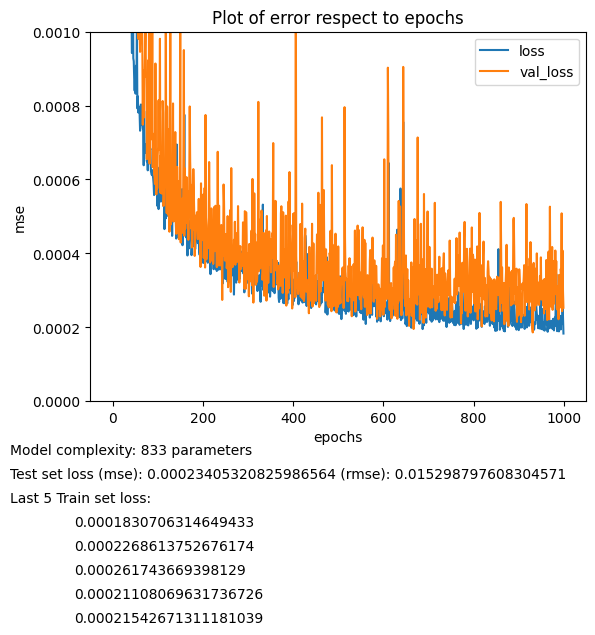

In [16]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-3])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [32]:
emp_test = np.array([-2.9219,3.009,4.4996,45])
emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [33]:
model.predict(emp_test)

array([[6.7013755]], dtype=float32)

# Scatter plot

In [19]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [ ]:
pred = predictions(X_test)

In [ ]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

In [ ]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [26]:
model.save('CPL_meV.h5')

In [29]:
from keras.models import load_model
model2 = load_model('CPL_meV.h5')

In [32]:
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model2.predict(k))) 
    return pred

In [33]:
pred = predictions(X_test)

In [34]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.012320350990509602